## Transfer Learning with Pre-trained Models for Image Classification

In this notebook we apply transfer learning to migrate the knowledge learned from a large source dataset to a smaller target dataset.

Transfer learning of an pre-trained fixed classifier involves:
1. Import GluonCV packages and modules required
2. Download and load the pre-trained model
    * Grab a pre-trained neural network model from GluonCV's classification `model_zoo`, trained on a large source dataset (e.g., the ImageNet dataset). A model is specified by its name. A detailed list of models can be found here https://gluon-cv.mxnet.io/model_zoo/classification.html. GluonCV's `model_zoo` package provides many more common pre-trained models for other computer vision tasks as well: https://gluon-cv.mxnet.io/model_zoo/index.html 
3. Load an image and classify it with the pre-trained classifier
    * Grab an image you would like to classify, apply default data preprocessing to prepare the image for classification, and use the pre-trained model to find the Top-5 classes of the image with their predicted probabilities.

Let’s try it out!

### 1. Import GluonCV packages and modules required

In [1]:
# Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.
# SPDX-License-Identifier: MIT-0

# Setup the AutoGluon environment
# WARNING: this might take a couple of minutes the first time around!

!pip install --upgrade pip -q mxnet gluoncv

In [2]:
import mxnet as mx
import gluoncv as gcv
import numpy as np
import matplotlib.image as mpimg
%matplotlib inline
import matplotlib.pyplot as plt

from mxnet import nd, image
from mxnet.gluon.data.vision import transforms
from gluoncv.model_zoo import get_model
from gluoncv.utils import viz, download

### 2. Download and load the pre-trained model

We use the __VGG16__ model, which was pre-trained on the ImageNet dataset, as the source model. More pre-trained classification models can be found here https://gluon-cv.mxnet.io/model_zoo/classification.html.

We specify `pretrained=True` to automatically download and load the pre-trained model parameters.

In [3]:
model_name = 'VGG16' # or 'VGG19' or ResNet18_v1'
pretrained_model = gcv.model_zoo.get_model(model_name, pretrained=True)

### 3. Load an image and classify it with the pre-trained classifier

Let's load some pictures and see what the network thinks they are.

#### 3.1 Load the image of a dog (from ImageNet dataset)

The input picture is classified to be
- [Welsh springer spaniel], with probability 0.768.
- [Brittany spaniel], with probability 0.058.
- [cocker spaniel], with probability 0.052.
- [Irish setter], with probability 0.040.
- [Blenheim spaniel], with probability 0.038.


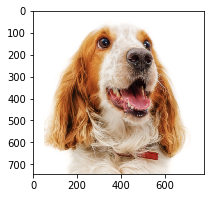

In [4]:
filename = '../../DATA/CV/EMBK-NLP-DOG-IMG.png'

# Load the image
img = mx.image.imread(filename)

# Plot the image 
plt.rcParams['figure.figsize'] = (5, 3)
viz.plot_image(img)

# Apply default data preprocessing
transformed_img = gcv.data.transforms.presets.imagenet.transform_eval(img)

# Apply the pre-trained model to obtain the predicted score for each class
pred = pretrained_model(transformed_img)

# Map predicted values to probability by softmax
prob = mx.nd.softmax(pred)[0].asnumpy()
# Find the 5 class indices with the highest score
ind = mx.nd.topk(pred, k=5)[0].astype('int').asnumpy().tolist()
# Print the class name and predicted probability
print('The input picture is classified to be')
for i in range(5):
    print('- [%s], with probability %.3f.'%(pretrained_model.classes[ind[i]], prob[ind[i]]))

That is very good! All top five predictions are from different dog breeds.

#### 3.2 Load the image of a chair

The input picture is classified to be
- [rocking chair], with probability 0.984.
- [cradle], with probability 0.005.
- [dining table], with probability 0.004.
- [folding chair], with probability 0.003.
- [crib], with probability 0.003.


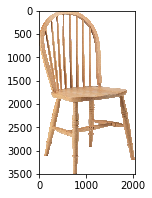

In [5]:
filename = '../../DATA/CV/EMBK-NLP-CHAIR-IMG.png'

# Load the image
img = mx.image.imread(filename)

# Plot the image 
plt.rcParams['figure.figsize'] = (5, 3)
viz.plot_image(img)

# Apply default data preprocessing
transformed_img = gcv.data.transforms.presets.imagenet.transform_eval(img)

# Apply the pre-trained model to obtain the predicted score for each class
pred = pretrained_model(transformed_img)

# Map predicted values to probability by softmax
prob = mx.nd.softmax(pred)[0].asnumpy()
# Find the 5 class indices with the highest score
ind = mx.nd.topk(pred, k=5)[0].astype('int').asnumpy().tolist()
# Print the class name and predicted probability
print('The input picture is classified to be')
for i in range(5):
    print('- [%s], with probability %.3f.'%(pretrained_model.classes[ind[i]], prob[ind[i]]))

This is interesting. In the ImageNet dataset, there is not a regular chair class. Therefore, it predicts closer objects (with small confidence) with rocking chair at the top (~99 % confidence).

#### 3.3 Load another image ...

The input picture is classified to be
- [soccer ball], with probability 0.606.
- [rugby ball], with probability 0.394.
- [football helmet], with probability 0.000.
- [volleyball], with probability 0.000.
- [baseball], with probability 0.000.


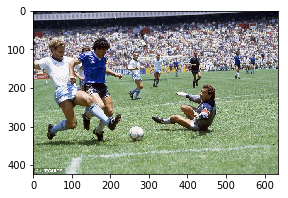

In [6]:
filename = '../../DATA/CV/EMBK-NLP-SPORT-IMG.jpg'

# Load the image
img = mx.image.imread(filename)

# Plot the image 
plt.rcParams['figure.figsize'] = (5, 3)
viz.plot_image(img)

# Apply default data preprocessing
transformed_img = gcv.data.transforms.presets.imagenet.transform_eval(img)

# Apply the pre-trained model to obtain the predicted score for each class
pred = pretrained_model(transformed_img)

# Map predicted values to probability by softmax
prob = mx.nd.softmax(pred)[0].asnumpy()
# Find the 5 class indices with the highest score
ind = mx.nd.topk(pred, k=5)[0].astype('int').asnumpy().tolist()
# Print the class name and predicted probability
print('The input picture is classified to be')
for i in range(5):
    print('- [%s], with probability %.3f.'%(pretrained_model.classes[ind[i]], prob[ind[i]]))

Soccer ball correctly classified.

#### 3.4 Load another image still (far from what the pre-trained model has previously seen)

The input picture is classified to be
- [organ], with probability 0.114.
- [bannister], with probability 0.085.
- [ocarina], with probability 0.061.
- [cinema], with probability 0.059.
- [plane], with probability 0.052.


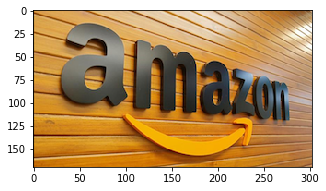

In [7]:
filename = '../../DATA/CV/EMBK-NLP-AMAZON-IMG.png'

# Load the image
img = mx.image.imread(filename)

# Plot the image 
plt.rcParams['figure.figsize'] = (5, 3)
viz.plot_image(img)

# Apply default data preprocessing
transformed_img = gcv.data.transforms.presets.imagenet.transform_eval(img)

# Apply the pre-trained model to obtain the predicted score for each class
pred = pretrained_model(transformed_img)

# Map predicted values to probability by softmax
prob = mx.nd.softmax(pred)[0].asnumpy()
# Find the 5 class indices with the highest score
ind = mx.nd.topk(pred, k=5)[0].astype('int').asnumpy().tolist()
# Print the class name and predicted probability
print('The input picture is classified to be')
for i in range(5):
    print('- [%s], with probability %.3f.'%(pretrained_model.classes[ind[i]], prob[ind[i]]))

This is an interesting result. As this network wasn't trained on Amazon images, it doesn't know what exactly this picture is.